# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [3]:
!ls ..

cocoapi				 models		      Udacity_Facial_Keypoints
CVND---Image-Captioning-Project  P1_Facial_Keypoints


In [4]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=3.74s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

{'segmentation': [[264.23, 150.61, 264.67, 147.73, 266.45, 146.17, 269.56, 144.61, 268.9, 143.06, 268.23, 140.84, 267.34, 137.28, 267.78, 136.61, 268.45, 135.5, 269.34, 134.17, 271.79, 132.83, 272.9, 132.39, 275.79, 132.83, 276.67, 133.28, 278.67, 136.61, 278.67, 137.72, 278.23, 139.72, 277.12, 142.61, 277.56, 144.61, 278.9, 145.95, 280.67, 147.06, 282.45, 149.5, 282.68, 151.73, 283.12, 155.06, 283.34, 159.5, 283.34, 159.95, 282.23, 161.28, 280.9, 161.5, 278.01, 160.84, 270.01, 158.39, 270.9, 153.5, 270.23, 152.39, 268.23, 151.5]], 'area': 325.8251000000002, 'iscrowd': 0, 'image_id': 427091, 'bbox': [264.23, 132.39, 19.11, 29.11], 'category_id': 1, 'id': 507385}
[{'license': 3, 'file_name': 'COCO_val2014_000000427091.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000427091.jpg', 'height': 442, 'width': 640, 'date_captured': '2013-11-16 12:53:03', 'flickr_url': 'http://farm2.staticflickr.com/1329/1338979265_d1e4ec41ab_z.jpg', 'id': 427091}]
{'license': 3, 'file

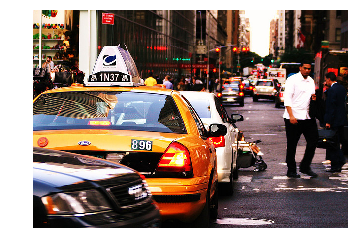

City traffic and pedestrians are headed in multiple directions on the street.
A city street busy with many cars driving as well as pedestrians
People in a city cross in front of traffic. 
Traffic in New York City during the day. 
Cars stopped on a busy street while pedestrians cross.


In [9]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
print(coco.anns[ann_id])
img_id = coco.anns[ann_id]['image_id']
print(coco.loadImgs(img_id))
img = coco.loadImgs(img_id)[0]
print(img)
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)